In [1]:
# imports
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
 
import numpy.random as random
import scipy.stats as stats


# Reviewing some things from before . . .

Set up two sets of 18 values from normal distributions, N(0,1) or N(1,1):

In [2]:
#initialize the arrays
ndata=18
data1=random.randn(ndata)
data2=random.randn(ndata)+1.

In [3]:
#find mean of each array
mean1=np.mean(data1)
mean2=np.mean(data2)

sigma1=np.std(data1,ddof=1)/np.sqrt(ndata) # want the standard deviation of the mean of data1
sigma2=np.std(data2,ddof=1)/np.sqrt(ndata) # want the standard deviation of the mean of data2


print(f'means: {mean1:.4f} , {mean2:.4f}')
print(f'sigmas: {sigma1:.4f} , {sigma2:.4f}')

tfactor=stats.t.ppf(1-0.025,ndata-1)
print(f'Confidence Interval for mean 1: [ {mean1-tfactor*sigma1:.4f} , {mean1+tfactor*sigma1:.4f} ]')
print(f'Confidence Interval for mean 2: [ {mean2-tfactor*sigma2:.4f} , {mean2+tfactor*sigma2:.4f} ]')


means: -0.2910 , 1.1726
sigmas: 0.2236 , 0.2315
Confidence Interval for mean 1: [ -0.7628 , 0.1808 ]
Confidence Interval for mean 2: [ 0.6841 , 1.6611 ]


Confidence intervals for the difference:

In [4]:
mean_diff=mean2-mean1
sigma_diff=np.sqrt(sigma1**2 + sigma2**2)
tfactor=stats.t.ppf(1-0.025, 2*ndata-2)

print(f'Observed difference of means: {mean_diff:.4f} ')

print(f'2-sided Confidence Interval: [ {mean_diff-tfactor*sigma_diff:.4f} , {mean_diff+tfactor*sigma_diff:.4f} ]')

tfactor=stats.t.ppf(1-0.05, 2*ndata-2)
print(f'1-sided Confidence Interval: > {mean_diff-tfactor*sigma_diff:.4f}')

Observed difference of means: 1.4636 
2-sided Confidence Interval: [ 0.8094 , 2.1178 ]
1-sided Confidence Interval: > 0.9193


# Permutation tests

We will combine `data1` and `data2` into 1 array; then generate sets of 2 datasets of size `ndata` and see how often their means differ as much as in the observed case.

In [5]:
# choose number of bootstrap samples
nsims=int(5E4)

# make a combined dataset from both original data arrays
datac=np.concatenate( (data1,data2) )

# generate the two bootstrap samples
fake1=np.random.choice(datac,size=(ndata,nsims) )
fake2=np.random.choice(datac,size=(ndata,nsims) )



## Application to means

In [6]:
# Calculate the means for each simulated dataset: should be nsims elements in each array
fakemeans1 = np.mean(fake1,axis=0)
fakemeans2 = np.mean(fake2,axis=0)

# Calculate the difference between the means
diffs=fakemeans2-fakemeans1  

__Using the below code box, plot histograms of the distributions of `fakemeans1` and `fakemeans2`, using the same binning and ~100 bins.__



(array([1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        9.000e+00, 5.000e+00, 7.000e+00, 1.300e+01, 2.300e+01, 2.900e+01,
        2.600e+01, 4.500e+01, 3.300e+01, 6.200e+01, 5.800e+01, 7.600e+01,
        9.000e+01, 1.180e+02, 1.430e+02, 1.570e+02, 1.680e+02, 2.270e+02,
        2.510e+02, 3.250e+02, 3.980e+02, 4.090e+02, 4.810e+02, 5.000e+02,
        6.070e+02, 7.490e+02, 7.850e+02, 8.690e+02, 9.540e+02, 1.094e+03,
        1.156e+03, 1.234e+03, 1.318e+03, 1.333e+03, 1.344e+03, 1.474e+03,
        1.563e+03, 1.581e+03, 1.638e+03, 1.639e+03, 1.650e+03, 1.653e+03,
        1.599e+03, 1.566e+03, 1.593e+03, 1.570e+03, 1.522e+03, 1.448e+03,
        1.389e+03, 1.351e+03, 1.256e+03, 1.151e+03, 1.079e+03, 1.011e+03,
        9.000e+02, 8.240e+02, 8.040e+02, 6.460e+02, 6.270e+02, 5.350e+02,
        4.550e+02, 4.040e+02, 3.340e+02, 3.170e+02, 2.460e+02, 2.050e+02,
        1.530e+02, 1.270e+02, 1.260e+0

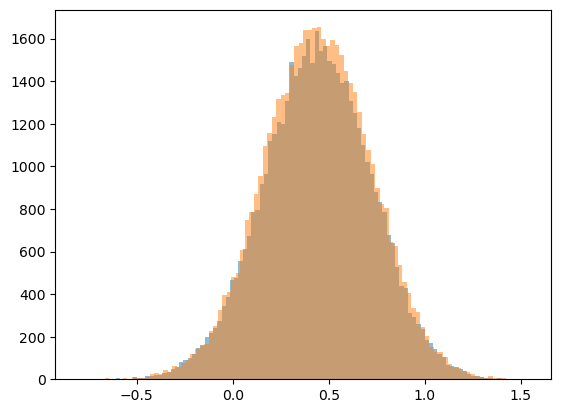

In [11]:
plt.hist(np.ravel(fakemeans1),alpha=0.5,bins=100)
plt.hist(np.ravel(fakemeans2),alpha=0.5,bins=100)

__Using the below code box, plot a histogram of the distribution of differences between the means of each sample(`diffs`), using ~100 bins.  Add a vertical dashed line at the observed value of the difference between the means of the two real data samples (`data1` and `data2`) (you can use `plt.axvline` for this).__

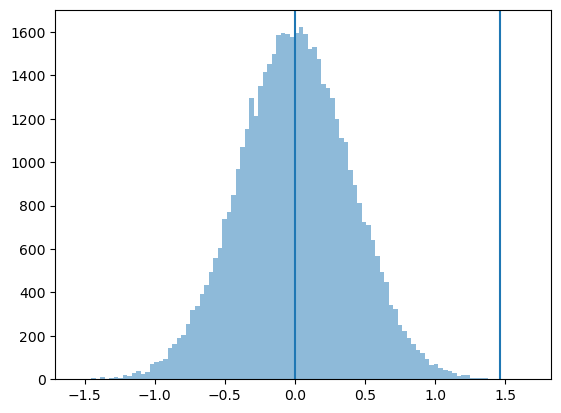

In [23]:
plt.hist(diffs,bins=100,alpha=0.5)
plt.axvline(0)
plt.axvline(1.4636) #observed difference of means

In [21]:
# print significance (alpha) = 0.32, 0.05, 0.01, and 0.001 limits on mean2-mean1
print(f'cutoffs: {np.percentile(diffs,(68.,95.,99.,99.9))}')

#make some empty space
print()

# compare the observed difference between the means to these cutoffs
print(f'Observed difference of means: {mean_diff:.4f} ')
print()

cutoffs: [0.18545878 0.64893073 0.91934913 1.216952  ]

Observed difference of means: 1.4636 



We can get a p-value using `scipy.stats.percentileofscore(array,value)`, which returns the percentile in `array` corresponding to the observed value `value`.

In [22]:
print(f'p-value: {( 100-stats.percentileofscore(diffs,mean2-mean1) )/100.:.6g}')

p-value: 0.00014


not consistent datasets, it was not right to put them together.

## Application to standard deviations

We can also use the permutation test to investigate whether the ratio of standard deviations of the two samples could be different (note that each array by construction had the same intrinsic standard deviation, 1).

In [14]:
# calculate std. dev. of each bootstrap fake sample

fakesigmas1=np.std(fake1,axis=0,ddof=1)
fakesigmas2=np.std(fake2,axis=0,ddof=1)

ratio=fakesigmas2/fakesigmas1
realratio=np.std(data2,ddof=1)/np.std(data1,ddof=1)

__Using the below code box, plot histograms of the two `fakesigmas` arrays, using ~100 bins each and the same binning.__

(array([4.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 5.000e+00, 5.000e+00,
        3.000e+00, 4.000e+00, 8.000e+00, 1.800e+01, 1.500e+01, 2.400e+01,
        3.100e+01, 3.000e+01, 4.000e+01, 6.100e+01, 5.700e+01, 6.800e+01,
        9.400e+01, 1.110e+02, 1.080e+02, 1.450e+02, 1.750e+02, 2.060e+02,
        2.320e+02, 2.610e+02, 3.070e+02, 3.740e+02, 4.190e+02, 4.390e+02,
        4.910e+02, 5.420e+02, 6.220e+02, 6.940e+02, 6.730e+02, 8.550e+02,
        8.780e+02, 9.150e+02, 1.071e+03, 1.107e+03, 1.118e+03, 1.150e+03,
        1.271e+03, 1.385e+03, 1.323e+03, 1.469e+03, 1.457e+03, 1.420e+03,
        1.519e+03, 1.561e+03, 1.495e+03, 1.491e+03, 1.563e+03, 1.470e+03,
        1.411e+03, 1.349e+03, 1.328e+03, 1.306e+03, 1.262e+03, 1.207e+03,
        1.163e+03, 1.078e+03, 9.740e+02, 9.260e+02, 8.410e+02, 8.140e+02,
        7.240e+02, 6.580e+02, 5.880e+02, 4.900e+02, 4.800e+02, 4.100e+02,
        3.430e+02, 3.150e+02, 2.880e+02, 2.040e+02, 1.750e+02, 1.720e+02,
        1.500e+02, 9.500e+01, 1.150e+0

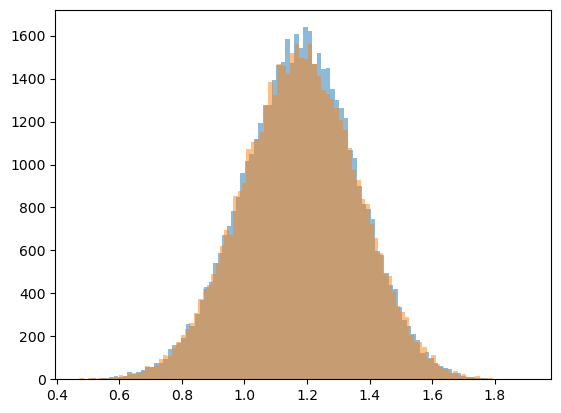

In [27]:
plt.hist(np.ravel (fakesigmas1),bins=100,alpha=0.5)
plt.hist(np.ravel (fakesigmas2),bins=100,alpha=0.5)

__Using the below code box, plot a histogram of the ratio of the two sigmas, i.e. `ratio=fakesigma2/fakesigma1`, with ~100 bins.  Put a vertical line at the observed value of the ratio calculated from `data1` and `data2`.__

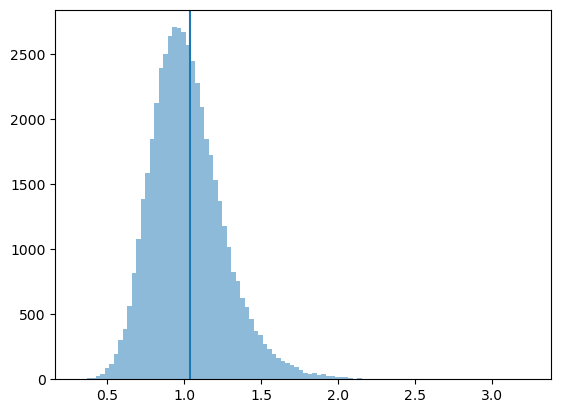

In [30]:
plt.hist(ratio,bins=100,alpha=0.5)
plt.axvline(realratio)

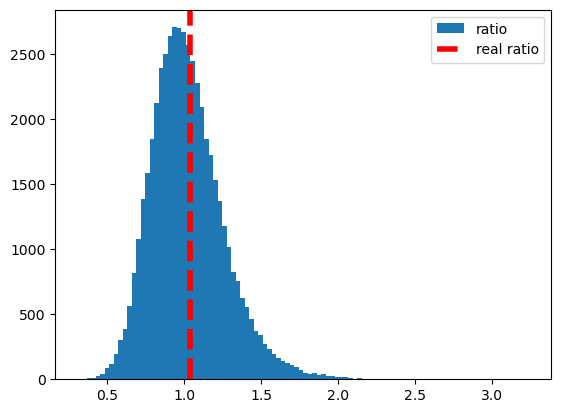

In [47]:
plt.hist(ratio,bins=100,label='ratio')
plt.axvline(x = realratio, ymin = 0, ymax = 2500,
            linewidth = 4, linestyle ="--",
            color ='red',label='real ratio')
plt.legend()

That means we don't reject these values

__Using the below code box, determine the limits of the 68 and 95 percent regions (NOT the 68/95th percentile points, as we want a 2-sided test) for the value of this ratio, determined using the permutation tests.__ 

__Compare these limits to the observed value.__

__Also calculate the p-value for the observed ratio (again, keeping in mind that we want to do a 2-sided test, so we want to calculate the probability of anything either more extremely large OR more extremely small under the hypothesis that there is no difference): so this must be twice as large as the difference of your observed percentile/100  and either 0 or 1, whichever is closer...__

__What do you conclude about whether the observed ratio of standard deviations is consistent with the hypothesis of no difference?__

In [39]:
print(f'p-value: {( 100-stats.percentileofscore(ratio,sigma1/sigma2))/100.:.6g}')

p-value: 0.5624


In [42]:
?stats.kstest

Signature:
stats.kstest(
    rvs,
    cdf,
    args=(),
    N=20,
    alternative='two-sided',
    method='auto',
    *,
    axis=0,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for
goodness of fit.

The one-sample test compares the underlying distribution F(x) of a sample
against a given distribution G(x). The two-sample test compares the
underlying distributions of two independent samples. Both tests are valid
only for continuous distributions.

Parameters
----------
rvs : str, array_like, or callable
    If an array, it should be a 1-D array of observations of random
    variables.
    If a callable, it should be a function to generate random variables;
    it is required to have a keyword argument `size`.
    If a string, it should be the name of a distribution in `scipy.stats`,
    which will be used to generate random variables.
cdf : str, array_like or callable
    If array_like, it should be a 1-D a

# The Kolmogorov-Smirnov Test

Let's set up two sets of Poisson-distributed data, with mean 5 or 7.5, and see if we can detect differences.  

In [40]:
ndata = 25
countb = stats.poisson.rvs(5,size=(ndata) )
countr =stats.poisson.rvs(7.5,size=(ndata) )

__Use the below code box to bring up the help on `stats.ks_2samp`.__

In [44]:
?stats.ks_2samp

Signature:
stats.ks_2samp(
    data1,
    data2,
    alternative='two-sided',
    method='auto',
    *,
    axis=0,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.

This test compares the underlying continuous distributions F(x) and G(x)
of two independent samples.  See Notes for a description of the available
null and alternative hypotheses.

Parameters
----------
data1, data2 : array_like, 1-Dimensional
    Two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the null and alternative hypotheses. Default is 'two-sided'.
    Please see explanations in the Notes below.
method : {'auto', 'exact', 'asymp'}, optional
    Defines the method used for calculating the p-value.
    The following options are available (default is 'auto'):
    
      * 'auto' : use 'exact' for smal

__Evaluate whether the K-S test below finds a statistically significant difference between the two samples.__

In [41]:
d,p = stats.ks_2samp(countb,countr)
print(f'd value: {d:.4f} , p-value: {p:.6g}')

d value: 0.4800 , p-value: 0.00561441


try bootstrapping or t test to see how much the values bounce?

# The Mann-Whitney U Test

__Use the below code box to bring up the help on `stats.mannwhitneyu`.__

In [45]:
?stats.mannwhitneyu

Signature:
stats.mannwhitneyu(
    x,
    y,
    use_continuity=True,
    alternative='two-sided',
    axis=0,
    method='auto',
    *,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Perform the Mann-Whitney U rank test on two independent samples.

The Mann-Whitney U test is a nonparametric test of the null hypothesis
that the distribution underlying sample `x` is the same as the
distribution underlying sample `y`. It is often used as a test of
difference in location between distributions.

Parameters
----------
x, y : array-like
    N-d arrays of samples. The arrays must be broadcastable except along
    the dimension given by `axis`.
use_continuity : bool, optional
    Whether a continuity correction (1/2) should be applied.
    Default is True when `method` is ``'asymptotic'``; has no effect
    otherwise.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    Let *SX(u)* and *SY(u)* be the survival

__Evaluate whether the U test below finds a statistically significant difference between the two samples.__

In [46]:
u,p = stats.mannwhitneyu(countb,countr)
print(f'U value: {u:.4f} , p-value: {p:.4g}')


U value: 127.0000 , p-value: 0.0002947
